$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\Yv}{\mathbf{Y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\gv}{\mathbf{g}}
\newcommand{\Hv}{\mathbf{H}}
\newcommand{\dv}{\mathbf{d}}
\newcommand{\Vv}{\mathbf{V}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\Zv}{\mathbf{Z}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
$

# Sample-by-Sample Linear Regression

Also referred to as sequential, on-line, or stochastic gradient descent, training.

Let's say we want to model a set of data points with a linear function.  Call that function $g(\xv; \wv)$, a function of $\xv$ that is parameterized by $\wv$.  

$$
    g(\xv;\wv) = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_D x_D = \xv^T \wv
$$

The parameter vector $\wv = (w_0, w_1, w_2, \ldots, w_D)$.

Given a bunch of samples of $\xv$ and desired target values of $g(\xv)$, how do we pick values of $\wv$?  We want to pick values of $\wv$ for which $g(\xv;\wv)$ "is close to" the desired target values.  A common approach is to pick values of $\wv$ that minimize the sum of the squared errors, defined by the following equation, where $t_n$ is the target value for input $\xv_n$. 

$$
\begin{align*}
\wv_{\mbox{best}} &= \argmin{\wv} \sum_{n=1}^N (t_n - g(\xv_n ; \wv))^2\\
 & = \argmin{\wv} \sum_{n=1}^N (t_n - \xv_n^T \wv)^2
 \end{align*}
$$

Since the derivative of this sum of squared errors with respect to $\wv$, we can set the derivative equal to zero and solve for $\wv$ to get

$$
      \wv = (X^T X)^{-1} X^T T
$$

where $X$ is a matrix of all input samples as rows, and $T$ is a matrix of all target values as rows.

But what if you have thousands or millions of samples?  $X$ and $T$
can be quite large. To avoid dealing with matrix operations on huge
matrices, we can derive a sequential algorithm for finding $\wv$ by
using the fact that a derivative of a sum is the sum of the
derivatives.

$$
\begin{align*}
\frac{\partial \sum_{n=1}^N (t_n - \xv_n^T \wv)^2}{\partial \wv} 
&= 
\sum_{n=1}^N \frac{\partial (t_n - \xv_n^T \wv)^2}{\partial \wv}\\
&= 
\sum_{n=1}^N 2 (t_n - \xv_n^T  \wv) (-1) \xv_n\\
&= -2 \sum_{n=1}^N (t_n - \xv_n^T  \wv) \xv_n\\
\end{align*}
$$

So far this is just another way to write the matrix equation for
$\wv$.  However, instead of summing over all $N$ samples, what if we
just update $\wv$ after each sample based on the derivative of the
squared error for that sample?  The derivative for a sample $n$ can be
considered as a limited, or noisy, sample of the overall derivative.
Thus, we can take a small step in the direction of the negative derivative to try
to bring a current guess at the weight vector, $\wv^{(k)}$, on
iteration $k$ closer to a value that reduces the overall error. In general this kind of update is called "stochastic approximation".

$$
\begin{align*}
\wv^{(k+1)} &= \wv^{(k)} - (-2) \eta (t_n - \xv_n^T  \wv) \xv_n\\
 &= \wv^{(k)} + \eta (t_n - \xv_n^T  \wv) \xv_n
\end{align*}
$$

For this sequential algorithm to converge, $\eta$ must decrease with
each iteration, not too fast but not too slow. 

This algorithm is called the least mean squares (LMS) algorithm
developed by Widrow and Hoff.  It is now often referred to as the
''stochastic gradient descent'' algorithm for linear models.

Let's animate the progress down the derivative.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

This approach to animation is modeled after [this notebook](https://nbviewer.jupyter.org/github/WillClaudeHolmes/Jupyter_Examples/blob/master/AnimationIllustration.ipynb).

In [3]:
import IPython.display as ipd

In [4]:
nSamples = 1000
X = np.random.uniform(0, 10, size=(nSamples, 1))
T = 2 - 0.1 * X + np.random.normal(0, 0.1, size=(nSamples, 1)) + 0.0 * (X - 6)**2 # Change 0 to 0.05 to try to fit nonlinear cloud

X1 = np.insert(X, 0, 1, axis=1)
# T = ts.reshape((-1,1))

X1.shape, T.shape

((1000, 2), (1000, 1))

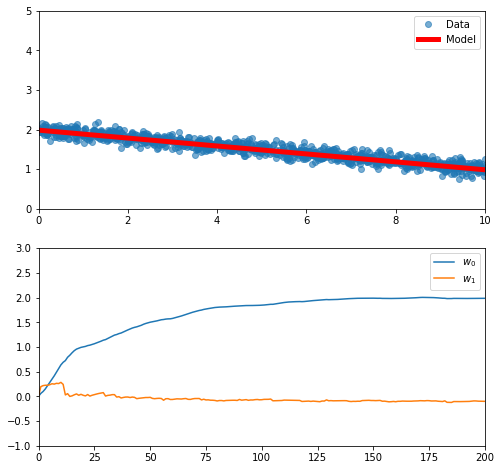

In [5]:
nFrames = 2000
nUpdatesPerFrame = 10
nIterations = nFrames // nUpdatesPerFrame
w = np.zeros((2, 1))
ws = [w.copy()]
eta = 0.01
step = 0

fig = plt.figure(figsize=(8, 8))
for step in range(nIterations):
    plt.clf()
    
    for updatei in range(nUpdatesPerFrame):
        step += 1
        n = step % nSamples
 
        
        # ======================== DOWN HERE IS THE WHOLE ALGORITHM, FROM HERE....
        # -------------------- Here is the output of the linear model g(x;w)
        predicted = X1[n:n+1, :] @ w
        # -------------------- Here is the gradient of the sum of squared errors with respect to w
        dEdw = - (T[n:n+1, :] - predicted) * X1[n:n+1, :].T
        # -------------------- Here we take a smallstep in the direction of the negative gradient
        w -= eta * dEdw
        # ========================                             .... TO HERE
        
    ws.append(w.copy())
 
    plt.subplot(2, 1, 1)
    plt.plot(X, T, 'o', alpha=0.6)
    xs = np.linspace(0, 10, 100).reshape((-1, 1))
    xs1 = np.insert(xs, 0, 1, axis=1)
    plt.plot(xs, xs1 @ w, 'r-', linewidth=5)  # will use modelLine to update model plot
    plt.legend(('Data','Model'), loc='upper right')
    plt.xlim(0, 10)
    plt.ylim(0, 5)

    plt.subplot(2, 1, 2)
    plt.plot(np.array(ws)[:, :, 0])  # will use to update plot of weights trajectory
    plt.xlim(0, nIterations)
    plt.ylim(-1, 3)
    plt.legend(('$w_0$', '$w_1$'))

    ipd.clear_output(wait=True)
    ipd.display(fig)
    
ipd.clear_output(wait=True)

## Linear Models as Neural Networks

Let's extend the model above just a bit by allowing multiple outputs.  We might want to predict horsepower and acceleration of a car from a set of measurements about the car, like its weight, engine displacement and number of cylinders.

Given $X$ and $T$, find $\wv_k$ that minimizes squared error in
the $k^{th}$ output, then use it to make predictions.
Collect all $\wv_k$ as columns in $\Wv$.
$\tilde{\Xv}$ denotes $\Xv$ with  constant 1 column.  The target value
for the $k^{th}$ output for the $n^{th}$ sample is $t_{n,k}$.

$$
\begin{align*}
  E(\Wv) &= \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - \tilde{\xv}_n^T \wv_k)^2\\
   \Wv &= (\tilde{\Xv}^T \tilde{\Xv})^{-1} \tilde{\Xv}^T \Tv\\
 ~\\
  \Wv &= \begin{bmatrix}
    w_{0,1} & w_{0,2} & \cdots & w_{0,K}\\
    w_{1,1} & w_{1,2} & \cdots & w_{1,K}\\
    \vdots\\
    w_{D,1} & w_{D,2} & \cdots & w_{D,K}
  \end{bmatrix}\\
 ~\\
  \Yv &= \tilde{\Xv} \Wv\\
  ~\\
\tilde{\Xv} & \text{ is } N \times (D+1)\\
\Wv & \text{ is } (D+1) \times K\\
\Yv & \text{ is } N \times K
\end{align*}
$$

The calculation of $y_{n,k} = \tilde{\xv_n} \wv_k$ can be drawn as


<img src="http://www.cs.colostate.edu/~anderson/cs440/notebooks/nnlinear.png">


Nice picture, but we can still only learn linear functions of the input.  What if a quadratic, or sine function of the input would fit the data better?  

## Structure of a Two Layer Neural Network

We have just entered the world of neural networks. Models other than linear can be formed by adding another layer of units between the input and the output layer. 

<img src="http://www.cs.colostate.edu/~anderson/cs440/notebooks/nnTwoLayer.png">

$\;\;\;\; \tilde{\Xv} \;\;\;\;\;\;\;\;\;\;\;\;$ 
$\;\;\;\;\;\;\;\; \Vv \;\;\;\;\;\;\;\;\;\;\;\;$
$ \;\;\; \tilde{\Zv} \;\;\;\;\;\;\;\;\;\;\;\;$ 
$\;\;\;\;\;\;\;\; \Wv \;\;\;\;\;\;\;\;\;\;\;\;$ 
$\; \Yv \;\;\;\;\;\;\;\;\;\;\;\;$

$ N \times (D+1) \;~~$
$(D+1) \times M \;~~$
$ N \times (M+1) \;~~$
$(M+1)\times K \;~~$
$ N \times K$

$$
\begin{align*}
\tilde{\Zv} & = h(\tilde{\Xv} \Vv),\\
\Yv & = \tilde{\Zv} \Wv, \text{ or }\\
\Yv & = \tilde{h}(\tilde{\Xv} \Vv) \Wv 
\end{align*}
$$

The two layers are called the **hidden** and **output** layer.

$h$ is the **activation function** for the units in the hidden layer.

We will be doing gradient descent in the squared error, so want
an $h$ whose derivative doesn't grow out of control as $\vv$ grows, and whose
derivative is easy to calculate.

What about polynomials?

In [7]:
import numpy as np
import matplotlib.pyplot as plt

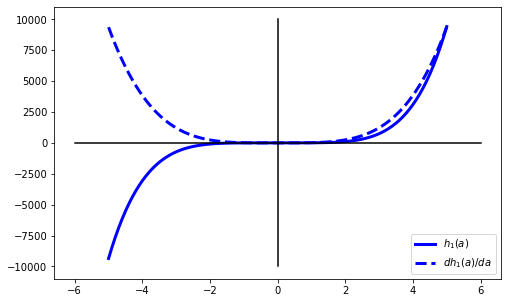

In [8]:
def h(x):
    return 3 + 2 * x + 1 * x**2 + 3 * x**5

def dh(x):
    return 2 + 2 * x + 15 * x**4

plt.figure(figsize=(8, 5))
xs = np.linspace(-5, 5, 100)
plt.plot(xs, h(xs), 'b-', linewidth=3, label='$h_1(a)$')
plt.plot(xs, dh(xs), 'b--', linewidth=3, label='$d h_1(a)/da$')

plt.plot((-6, 6), (0, 0), 'k')
plt.plot((0, 0), (-10000, 10000), 'k')
plt.plot([0, 0], [-1, 1], 'r--', linewidth=3, alpha=0.5)
plt.legend(loc='best');

A gradient descent procedure takes steps of size proportional to the derivative.  This derivative gets huge---high positive as $a$ increases and high negative as $a$ decreases---so gradient descent if very unstable.  Such huge steps will shoot the gradient descent far away from a close local minimum.

Two common choices for functions with well-behaved derivatives are, where $a = \tilde{\xv}^T \vv$:
  * sigmoid (asymmetric)
  
$$
        \begin{align*}
          h_1(a) & = \frac{1}{1+e^{-a}}
        \end{align*}
$$

  * tanh (symmetric)
  
$$
        \begin{align*}
          h_2(a) & = \tanh(a) = \frac{e^{a} - e^{-a}}{e^{a} + e^{-a}}
        \end{align*}
$$

Try to derive the derivatives of these functions with respect to $a$.

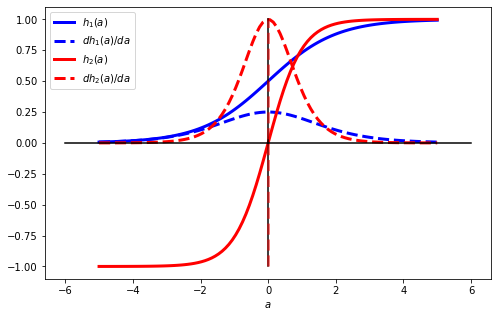

In [9]:
def h1(a):
    return 1 / (1 + np.exp(-a))

def h2(a):
    return np.tanh(a)

def dh1(a):
    y = h1(a)
    return y * (1 - y)

def dh2(a):
    y = h2(a)
    return 1 - y * y

plt.figure(figsize=(8, 5))
xs = np.linspace(-5, 5, 100)
plt.plot(xs, h1(xs), 'b-', linewidth=3, label='$h_1(a)$')
plt.plot(xs, dh1(xs), 'b--', linewidth=3, label='$d h_1(a)/da$')

plt.plot(xs, h2(xs), 'r-', linewidth=3, label='$h_2(a)$')
plt.plot(xs, dh2(xs), 'r--', linewidth=3, label='$d h_2(a)/da$')

plt.plot((-6, 6), (0, 0), 'k')
plt.plot((0, 0), (-1, 1), 'k')
plt.plot([0, 0], [-1, 1], 'r--', linewidth=3, alpha=0.5)

plt.xlabel('$a$')
plt.legend(loc='best');

Notice that as the weights increase in magnitude, the argument $a$ to these functions increases in magnitude and you move far left or far right on the x axis.  What happens to the derivatives out there?

## Training by Gradient Descent

The mean squared error between each target value $t_{n,k}$ and
output (predicted) value $y_{n,k}$ is

$$
\begin{align*}
  E &= \frac{1}{N} \frac{1}{K} \sum_{n=1}^N \sum_{k=1}^K ( t_{n,k} - y_{n,k})^2
\end{align*}
$$

Since the gradient of $E$ is no longer a linear function of the parameters (weights), we cannot set the derivative equal to zero and solve for the parameters.  Instead, we can do 
gradient descent in $E$ by making small changes to weights $v_{j,m}$ and $w_{m,k}$ in the negative gradient direction. 

$$
\begin{align*}
  v_{j,m} &\leftarrow v_{j,m} - \rho_h \frac{\partial E}{\partial v_{j,m}}\\
  w_{m,k} &\leftarrow w_{m,k} - \rho_o \frac{\partial E}{\partial w_{m,k}}
\end{align*}
$$

This is often presented as $\rho_h = \rho_o$, but having different
rates in the two layers often helps convergence rate.

Will this find the global optimum (the values of $v$ and $w$
that minimize the mean squared error)?

So, now how do we calculate $\frac{\partial E}{\partial v_{j,m}}$ and $\frac{\partial E}{\partial w_{m,k}}$?

### First a Simplified View

Remember our picture of a full two-layer network?  Let's focus
on how to modify a single weight, $v_{1,1}$, based on a single error between $y_1$ and $t_1$.

<img src="http://www.cs.colostate.edu/~anderson/cs440/notebooks/nnTwoLayerTargetsOnePath.png">

Let's drop the subscripts for now.

<img src="http://www.cs.colostate.edu/~anderson/cs440/notebooks/nnOnePath.png">

Forward calculation (ignoring constant 1 input and all other terms)

$$
\begin{align*}
  y &= w\; h(v\;x) \text{ or }\\
  y &= w\; z\\
  z &= h(a)\\
  a &= v\; x
\end{align*}
$$

<img src="http://www.cs.colostate.edu/~anderson/cs440/notebooks/nnOnePath2.png">

Since $E = (t - y)^2$

$$
\begin{align*}
  \frac{\partial E}{\partial v} & = \frac{\partial (t - y)^2}{\partial v}
\end{align*}
$$

The Chain Rule to the rescue.

$$
\begin{align*}
  \frac{\partial E}{\partial v} & = \frac{\partial (t-y)^2}{\partial v}\\
  & = \frac{\partial (t-y)^2}{\partial y} \frac{\partial y}{\partial z} \frac{\partial z}{\partial a} \frac{\partial a}{\partial v} \\
  & = 2(t-y) \;\;(-1)\;\; w \;\;  \frac{\partial h(a)}{\partial a} \;\; x \\
\end{align*}
$$

If $h(a) = \tanh(a)$, then $\frac{\partial h(a)}{\partial a} = (1-h(a)^2) = (1-z^2)$. See [this page at Mathematics Stack Exchange](http://math.stackexchange.com/questions/741050/hyperbolic-functions-derivative-of-tanh-x).

$$
\begin{align*}
  \frac{\partial E}{\partial v} & = -2(t-y) \;\; w \;\;  \frac{\partial h(a)}{\partial a} \;\; x \\
  & = -2(t-y) \;\; w \;\;  (1-z^2) \;\; x
\end{align*}
$$

Let's add another output.

<img src="http://www.cs.colostate.edu/~anderson/cs440/notebooks/nnTwoPath.png">

The Chain Rule again.

$$
       \begin{align*}
       \frac{\partial E}{\partial v} & = \frac{\partial (t_1-y_1)^2 + (t_2-y_2)^2}{\partial v}\\
       & = \frac{\partial (t_1-y_1)^2 + (t_2-y_2)^2}{\partial z} \frac{\partial z}{\partial a} \frac{\partial a}{\partial v} \\
       & = \left ( \frac{\partial (t_1-y_1)^2 + (t_2-y_2)^2}{\partial y_1}\frac{\partial y_1}{\partial z} + \frac{\partial (y_1-t_1)^2 + (y_2-t_2)^2}{\partial y_2}\frac{\partial
           y_2}{\partial z} \right )  \frac{\partial z}{\partial a} \frac{\partial a}{\partial v} \\
       & = \left ( -2(t_1-y_1) w_1 - 2(t_2 -y_2) w_2 \right ) \frac{\partial z}{\partial a} \frac{\partial a}{\partial v} \\
       & = -2 \left ( (t_1-y_1) w_1 + (t_2-y_2) w_2 \right ) \frac{\partial h(a)}{\partial a} x \\
       & = -2 \left ( (t_1-y_1) w_1 + (t_2-y_2) w_2 \right ) (1-z^2) x 
       \end{align*}
$$

Think of the errors calculated in the output units as being sent backwards to the units in the previous layer.  If we label these errors as "delta" values, our derivative expressions form what are commonly referred to as "delta rules".  The delta values are "backpropagated" to the previous layer.  This process is called "error backpropagation", but is really just the chain rule of calculating derivatives!

First, remember these derivatives.

$$
       \begin{align*}
       \frac{\partial E}{\partial v} & = -2 ( (t_1-y_1) w_1 + (t_2-y_2) w_2  ) (1-z^2) x \\
       \frac{\partial E}{\partial w_1} & = -2 (t_1-y_1) z
       \end{align*}
$$

Now the update rules involving the deltas ($\delta$) are 

$$
       \begin{align*}
       w &\leftarrow w - \frac{\partial E}{\partial w_1}\\
       &\leftarrow w + \rho_o  (t_1-y_1) z\\
       &\leftarrow w + \rho_o  \delta_1^{(o)}  z\\
       v & \leftarrow v - \frac{\partial E}{\partial v}\\
       & \leftarrow v + \rho_h \left ( (t_1-y_1) w_1 + (t_2-y_2) w_2 \right ) (1-z^2) x \\
       & \leftarrow v + \rho_h \left ( (t_1-y_1) w_1 + (t_2-y_2) w_2 \right ) (1-z^2) x \\
       & \leftarrow v + \rho_h \left ( \delta_1^{(o)} w_1 + \delta_2^{(o)} w_2 \right ) (1-z^2) x \\
       & \leftarrow v + \rho_h \delta^{(h)} x\\
&\;\;\; \text{ where } \delta^{(h)} =  ( \delta_1^{(o)} w_1 + \delta_2^{(o)} w_2  ) (1-z^2)
       \end{align*}
$$

### Now for the Full Version of Error Back-Propagation

<img src="http://www.cs.colostate.edu/~anderson/cs440/notebooks/nnTwoLayerBackProp.png">

$$
\begin{align*}
  v_{j,m} &\leftarrow v_{j,m} - \rho_h \frac{\partial E}{\partial
    v_{j,m}}\\
 w_{m,k} & \leftarrow w_{m,k} - \rho_o \frac{\partial E}{\partial w_{m,k}}
\end{align*}
$$

A bit of calculus and algebra lead us to these expressions for doing gradient descent.  Try to derive it yourself!!

$$
\begin{align*}
  v_{j,m} &\leftarrow v_{j,m} + \rho_h \frac{1}{N} \frac{1}{K} \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - y_{n,k}) w_{m,k} (1-\tilde{z}_m^2) \tilde{x}_{n,j}\\
  w_{m,k} &\leftarrow w_{m,k} + \rho_o \frac{1}{N}  \frac{1}{K} \sum_{n=1}^N
  (t_{n,k} - y_{n,k}) \tilde{z}_m
\end{align*}
$$

To summarize:

$$
    \begin{align*}
      E &= \frac{1}{N} \frac{1}{K} \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - y_{n,k})^2\\
      \frac{\partial E}{\partial w_{m,k}} & = -2 \frac{1}{N}  \frac{1}{K}
       \sum_{n=1}^N (t_{n,k} - y_{n,k}) \tilde{z}_{n,m}\\
      \frac{\partial E}{\partial v_{j,m}} & = -2 \frac{1}{N} \frac{1}{K} \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - y_{n,k})   w_{m,k} (1-z_{n,m}^2) \tilde{x}_{n,j}
    \end{align*}
$$

Forward pass

$$
    \begin{align*}
      z_{n,m} &= h(\sum_{j=0}^D v_{j,m} \tilde{x}_{n,j})\\
      y_{n,k} &= \sum_{m=1}^M w_{m,k} \tilde{z}_{n,m}
    \end{align*}
$$

Backward pass

$$
\begin{align*}
      v_{j,m} & \leftarrow v_{j,m} + \rho_h \frac{1}{N} \frac{1}{K} \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - y_{n,k})   w_{m,k} (1-z_{n,m}^2) \tilde{x}_{n,j}\\
 w_{m,k} & \leftarrow w_{m,k} + \rho_o \frac{1}{N}  \frac{1}{K}  \sum_{n=1}^N (t_{n,k} - y_{n,k}) \tilde{z}_{n,m}
    \end{align*}
$$

## Preparing for Python

Convert these scalar expressions to matrix expressions.

Forward Pass

$$
    \begin{align*}
      z_{n,m} &= h(\sum_{j=0}^D v_{j,m} \tilde{x}_{n,j})\\
      z_{n,m} &= h( v_{*,m} \tilde{x}_{n,*})\\
      z_{n,m} &= h(  \tilde{x}_{n,*} v_{*,m})\\
      z_{*_n,m} &= h(  \tilde{x}_{*_n,*} v_{*,m})\\
      z_{*_n,*_m} &= h(  \tilde{x}_{*_n,*} v_{*,*_m})\\
      \Zv &= h(\tilde{\Xv} \Vv)\\
      y_{n,k} &= \sum_{m=1}^M w_{m,k} \tilde{z}_{n,m}\\
      y_{n,k} &=  \tilde{z}_{n,*} w_{*,k}\\
      y_{*_n,*_k} &=  \tilde{z}_{*_n,*} w_{*,*_k}\\
      \Yv &= \tilde{\Zv} \Wv
    \end{align*}
$$

Backward Pass for $\Vv$

$$
    \begin{align*}
      v_{j,m} & \leftarrow v_{j,m} + \rho_h \frac{1}{N} \frac{1}{K} \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - y_{n,k})   w_{m,k} (1-z_{n,m}^2) \tilde{x}_{n,j}\\
      v_{j,m} & \leftarrow v_{j,m} + \rho_h \frac{1}{N} \frac{1}{K} \sum_{n=1}^N  (t_{n,*_k} - y_{n,*_k}) w_{m,*_k}^T   (1-z_{n,m}^2) \tilde{x}_{n,j}\\
      v_{j,m} & \leftarrow v_{j,m} + \rho_h \frac{1}{N} \frac{1}{K} \left ( (t_{*_n,*_k} - y_{*_n,*_k}) w_{m,*_k}^T \cdot  (1-z_{*_n,m}^2) \dimensionbar{N\times m} \right )^T
      \tilde{x}_{*_n,j} 
\end{align*}
$$

Almost.  Result on right hand side has subscripts $m,j$, but left side is $j,m$. So

$$
    \begin{align*}
      v_{j,m} & \leftarrow v_{j,m} + \rho_h \frac{1}{N} \frac{1}{K} \left ( \left ( (t_{*_n,*_k} - y_{*_n,*_k}) w_{m,*_k}^T \cdot  (1-z_{*_n,m}^2) \right )^T
      \tilde{x}_{*_n,j} \right )^T\\
       & \leftarrow v_{j,m} + \rho_h \frac{1}{N} \frac{1}{K} \tilde{x}_{*_n,j}^T \left ( (t_{*_n,*_k} - y_{*_n,*_k}) w_{m,*_k}^T \cdot  (1-z_{*_n,m}^2) \right )\\
       v_{*_j,*_m} & \leftarrow v_{*_j,*_m} + \rho_h \frac{1}{N} \frac{1}{K} \tilde{x}_{*_n,*_j}^T \left ( (t_{*_n,*_k} - y_{*_n,*_k}) w_{*_m,*_k}^T \cdot  (1-z_{*_n,*_m}^2)
       \right )\\
       \Vv & \leftarrow \Vv + \rho_h \frac{1}{N} \frac{1}{K} \tilde{\Xv}^T \left ( (\Tv - \Yv) \hat{\Wv}^T \cdot  (1-\Zv^2) \right )\\
       \Vv & \leftarrow \Vv + \rho_h \frac{1}{N} \frac{1}{K} \tilde{\Xv}^T \dimensionbar{D\times N} \left ( (\Tv - \Yv) \dimensionbar{N\times K} \hat{\Wv}^T \dimensionbar{N\times M} \cdot  (1-\Zv^2)
         \dimensionbar{N\times M}\right ) \dimensionbar{D\times M}\\
       \text{where } & \hat{\Wv} \text{ is } \Wv \text{ without constant input row}
\end{align*}
$$


Backward Pass for $\Wv$

$$
    \begin{align*}
      w_{m,k} & \leftarrow w_{m,k} + \rho_o \frac{1}{N}  \frac{1}{K} \sum_{n=1}^N (t_{n,k} - y_{n,k}) \tilde{z}_{n,m}\\
      & \leftarrow w_{m,k} + \rho_o \frac{1}{N}  \frac{1}{K} (t_{*_n,k} - y_{*_n,k})^T \tilde{z}_{*_n,m}
    \end{align*}
$$

Again, almost.  Result on right hand side has subscripts $k,m$ but need $m,k$. So

$$
    \begin{align*}
      w_{m,k} & \leftarrow w_{m,k} + \rho_o \frac{1}{N} \frac{1}{K}   \left ( (t_{*_n,k} - y_{*_n,k})^T \tilde{z}_{*_n,m} \right )^T\\
       & \leftarrow w_{m,k} + \rho_o \frac{1}{N} \frac{1}{K} \tilde{z}_{*_n,m}^T (t_{*_n,k} - y_{*_n,k}) \\
      w_{*_m,*_k} & \leftarrow w_{*_m,*_k} + \rho_o \frac{1}{N} \frac{1}{K}  \tilde{z}_{*_n,*_m}^T (t_{*_n,*_k} - y_{*_n,*_k}) \\
      \Wv & \leftarrow \Wv + \rho_o \frac{1}{N} \frac{1}{K}  \tilde{\Zv}^T (\Tv - \Yv)\\
      \Wv & \leftarrow \Wv + \rho_o \frac{1}{N} \frac{1}{K}  \tilde{\Zv}^T \dimensionbar{M\times N} (\Tv - \Yv \dimensionbar{N\times K}) \dimensionbar{M\times K}
    \end{align*}
$$

All together now, first in math.

$$
    \begin{align*}
      \Zv &= h(\tilde{\Xv} \Vv)\\
      \Yv &= \tilde{\Zv} \Wv\\
       \Vv & \leftarrow \Vv + \rho_h \frac{1}{N} \frac{1}{K} \tilde{\Xv}^T \left ( (\Tv - \Yv) \hat{\Wv}^T \cdot  (1-\Zv^2) \right )\\
      \Wv & \leftarrow \Wv + \rho_o \frac{1}{N}  \frac{1}{K}\tilde{\Zv}^T (\Tv - \Yv)
      \end{align*}
$$

Now in python.

    # Given input X and target T, do forward pass to calculate network output, Y
    X1 = addOnes(X)
    Z = tanh(X1 @ V))
    Z1 = addOnes(Z)
    Y = Z1 @ W
    # Do gradient descent on derivative of squared error with respect to each weight to update V and W.
    error = T - Y
    V = V + rh * X1.T @ ((error @ W[1:,:].T) * (1-Z**2))
    W = W + ro * Z1.T @ error

## Finally, the Code

The above equations show a single step down the gradient of our mean square error, $E$.  This is called [steepest descent](http://en.wikipedia.org/wiki/Gradient_descent).

Here is an example. Let's fit a neural network to the function

$$
f(x) = 0.2 + 0.05 (x+10) + 0.4 \sin(x+10)) + 0.2 \epsilon
$$

where $\epsilon$ is a random variable drawn from the standard normal
distribution, or $\epsilon \sim \mathcal{N}(0,1)$, and $x \in [-10,10]$.

In [10]:
import numpy as np
import matplotlib.pyplot as plt

import IPython.display as ipd  # for display and clear_output
import time  # for sleep

In [11]:
# Make some training data
n = 20
X = np.linspace(0., 20.0, n).reshape((n, 1)) - 10
T = 0.2 + 0.05 * (X + 10) + 0.4 * np.sin(X + 10) + 0.2 * np.random.normal(size=(n, 1))

# Make some testing data
Xtest = X + 0.1 * np.random.normal(size=(n, 1))
Ttest = 0.2 + 0.05 * (X + 10) + 0.4 * np.sin(Xtest + 10) + 0.2 * np.random.normal(size=(n, 1))

nSamples = X.shape[0]
nOutputs = T.shape[1]

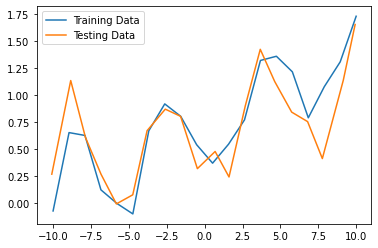

In [12]:
plt.plot(X, T, label='Training Data')
plt.plot(Xtest, Ttest, label='Testing Data')
plt.legend();

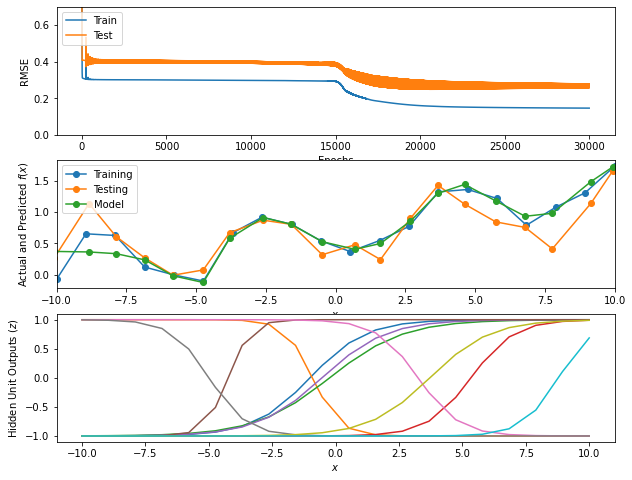

In [13]:
# Set parameters of neural network
nHiddens = 10

rhoh = 0.5
rhoo = 0.1

rh = rhoh / (nSamples * nOutputs)
ro = rhoo / (nSamples * nOutputs)

# Initialize weights to uniformly distributed values between small normally-distributed between -0.1 and 0.1
V = 0.1 * 2 * (np.random.uniform(size=(1 + 1, nHiddens)) - 0.5)
W = 0.1 * 2 * (np.random.uniform(size=(1 + nHiddens, nOutputs)) - 0.5)

# Add constant column of 1's
def addOnes(A):
    return np.insert(A, 0, 1, axis=1)

X1 = addOnes(X)
Xtest1 = addOnes(Xtest)

# Take nSteps steepest descent steps in gradient descent search in mean-squared-error function
nSteps = 30000

# collect training and testing errors for plotting
errorTrace = np.zeros((nSteps, 2))

fig = plt.figure(figsize=(10 ,8))

for step in range(nSteps):

    # Forward pass on training data
    Z = np.tanh(X1 @ V)
    Z1 = addOnes(Z)
    Y = Z1 @ W

    # Error in output
    error = T - Y

    # Backward pass - the backpropagation and weight update steps
    V = V + rh * X1.T @ ( ( error @ W[1:, :].T) * (1 - Z**2))
    W = W + ro * Z1.T @ error

    # error traces for plotting
    errorTrace[step, 0] = np.sqrt(np.mean((error**2)))
    
    Ytest = addOnes(np.tanh(Xtest1 @ V)) @ W  #!! Forward pass in one line
    errorTrace[step, 1] = np.sqrt(np.mean((Ytest - Ttest)**2))

    if step % 1000 == 0 or step == nSteps-1:
        plt.clf()
        
        # Plot the trace of the mean squared error on training and testing data
        plt.subplot(3, 1, 1)
        plt.plot(errorTrace[:step, :])
        plt.ylim(0, 0.7)
        plt.xlabel('Epochs')
        plt.ylabel('RMSE')
        plt.legend(('Train','Test'), loc='upper left')
        
        # Plot the training and testing data, and 
        # the output of our neural network model on the test data
        plt.subplot(3, 1, 2)
        plt.plot(X, T, 'o-', Xtest, Ttest, 'o-', Xtest, Ytest, 'o-')
        plt.xlim(-10, 10)
        plt.legend(('Training','Testing','Model'), loc='upper left')
        plt.xlabel('$x$')
        plt.ylabel('Actual and Predicted $f(x)$')
        
        # Plot the output of the hidden layer for each training sample
        plt.subplot(3, 1, 3)
        plt.plot(X, Z)
        plt.ylim(-1.1, 1.1)
        plt.xlabel('$x$')
        plt.ylabel('Hidden Unit Outputs ($z$)');
        
        ipd.clear_output(wait=True)
        ipd.display(fig)
ipd.clear_output(wait=True)